<a href="https://colab.research.google.com/github/cagBRT/IntroToDNNwKeras/blob/master/ML_Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Keras optimizer ensures that appropriate weights and loss functions are used to keep the difference between the predicted and actual value of the neural network learning model optimized. There are various types of Keras optimizers available to choose from.

Optimizers are the general concept used in neural networks because it involves randomly initializing and manipulating the value of weights for every epoch to increase the model network’s accuracy potential. A comparison is made in every epoch between the output from the training data and the actual data, which helps us calculate the errors and find out the loss functions and further updation of the corresponding weights.

There needs to be some way to conclude how the weight should be manipulated to get the most accuracy for which Keras optimizers come into the picture. Keras optimizer helps us achieve the ideal weights and get a loss function that is completely optimized. One of the most popular of all optimizers is gradient descent. Various other keras optimizers are available and used widely for different practical purposes. There is a provision of various

In [ ]:
!pip install plot-model

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
def build_compile(optimizer_name='SGD'):

    # Use the same network topology as last week
    model = keras.Sequential([ keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

    # compile the model with a cross-entropy loss and specify the given optimizer
    model.compile(optimizer=optimizer_name, loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
    return model

In [28]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
from plot_model import plot_model
plot_model()

ModuleNotFoundError: No module named 'plot_model'

here are various types of Keras optimizers that are listed below –

Adagrad: This optimizer of Keras uses specific parameters in the learning rates. It has got its base of the frequencies made in the updates by the value of parameters, and accordingly, the working happens. The individual features affect the learning rate and are adjusted accordingly. There is also the scenario where various values of the learning rate for some weights correspond.
Adam: This optimizer stands for Adaptive Moment estimation. This makes the adam algorithm; the gradient descent method is upgraded for the optimization tasks. It requires less memory and is very efficient. This method must go in this scenario when we have a lot of data in bulk quantity and parameters associated with it. It is most popular among developers of neural networks.
Nadam: This optimizer makes use of the Nadam algorithm. I stand for Nesterov and adam optimizer, and the component of Nesterov is more efficient than the previous implementations. Nesterov component is used for the updation of the gradient by the Nadam optimizer.
Adamax: It is the adaption of the algorithm of Adam optimizer hence the name Adam max. The base of this algorithm is the infinity norm. When using the models that have embeddings, it is considered superior to Adam optimizer in some scenarios.
RMSprop: It stands for Root mean Square propagation. The main motive of the RMSprop is to make sure that there is a constant movement in the average calculation of the square of gradients, and the performance of the task of division for gradient upon the root of average also takes place.

In [5]:
optimizer_names = ['SGD','Momentum','Nesterov', 'RMSprop','Adagrad','Adam','NAdam']
optimizer_list = ['SGD',keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=False),keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True), 'RMSprop','Adagrad','Adam','NAdam']

In [6]:
# Two arrays for training and validation performance
hist_acc = []
hist_val_acc = []

# Iterate over optimizers and train the network, using x_test and y_test as a validation set in each epoch
for item,name in zip(optimizer_list, optimizer_names):
    print("-----------------------------")
    print("Doing %s optimizer" %str(name))
    print("-----------------------------")

    # Get the model from our function above
    model = build_compile(item)

    # Train the model
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

    # Store the performance
    hist_acc.append(history.history['val_accuracy'])
    hist_val_acc.append(history.history['val_accuracy'])
    print("-----------------------------")

-----------------------------
Doing SGD optimizer
-----------------------------
Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6320 - accuracy: 0.8414 - val_loss: 0.3540 - val_accuracy: 0.9050
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3364 - accuracy: 0.9055 - val_loss: 0.2928 - val_accuracy: 0.9188
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2898 - accuracy: 0.9181 - val_loss: 0.2624 - val_accuracy: 0.9268
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2608 - accuracy: 0.9263 - val_loss: 0.2391 - val_accuracy: 0.9319
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2385 - accuracy: 0.9329 - val_loss: 0.2211 - val_accuracy: 0.9380
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2201 - accuracy: 0.9380 - val_loss: 0.2071 - val_accuracy: 0.9403
Epoch 7/50
1875/1875 [==============================] - 

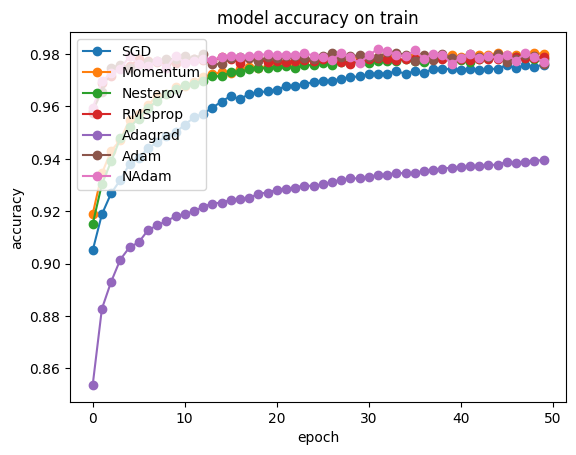

In [7]:
# summarize history for accuracy on training set
for i in range(len(optimizer_list)):
    plt.plot(hist_acc[i],'-o',label=str(optimizer_names[i]))
plt.title('model accuracy on train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

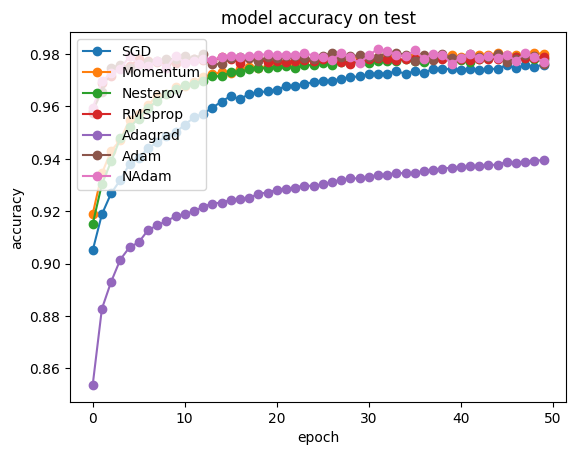

In [8]:
# summarize history for accuracy on test set
for i in range(len(optimizer_list)):
    plt.plot(hist_val_acc[i],'-o', label=str(optimizer_names[i]))
plt.title('model accuracy on test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()


In [9]:
nepochs = 50

In [10]:
# Implement formula (15)
initial_learning_rate = 0.01
epochs = nepochs
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return initial_learning_rate * 1 / (1 + decay * epoch)


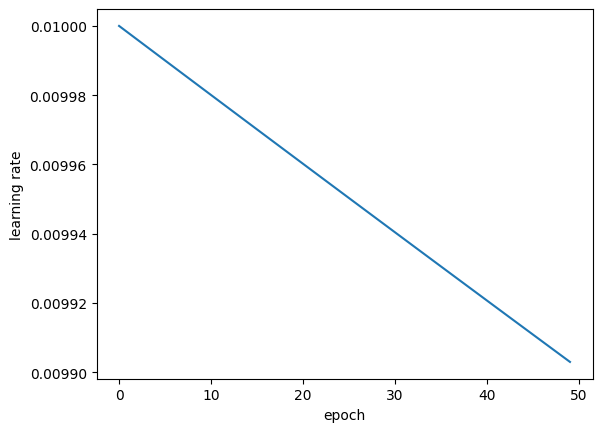

In [11]:
# Plot the learning rate as a function of the number of epochs
plt.plot(lr_time_based_decay(np.arange(0,nepochs),0.01))
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [12]:
# Train the network with the learning rate schedule
model = build_compile()
history_time_based_decay = model.fit(
    x_train,
    y_train,
    epochs=nepochs,
    batch_size=32,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)], validation_data=(x_test, y_test))



Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6475 - accuracy: 0.8354 - val_loss: 0.3583 - val_accuracy: 0.9023 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009998000399920017.
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3394 - accuracy: 0.9045 - val_loss: 0.2982 - val_accuracy: 0.9147 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009996001599360257.
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2910 - accuracy: 0.9171 - val_loss: 0.2632 - val_accuracy: 0.9254 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009994003597841297.
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2615 - accuracy: 0.9264 - val_loss: 0.2402 - val_accuracy: 0.9306 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.009992006394

In [13]:
# Implement formula (16)
initial_learning_rate = 0.01
def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 10.0
    return initial_learning_rate * np.power(drop_rate, np.floor(epoch/epochs_drop))

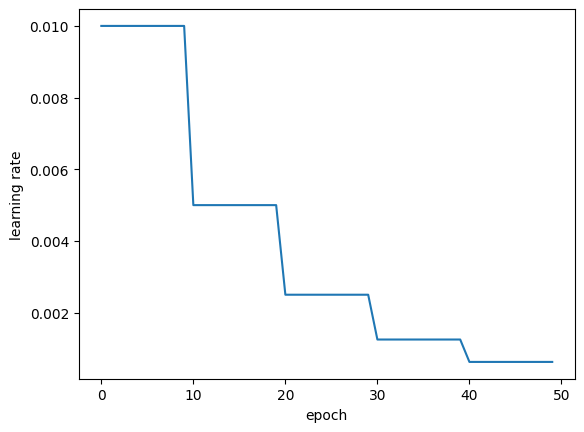

In [14]:
# Plot the learning rate as a function of the number of epochs
plt.plot(lr_step_decay(np.arange(0,nepochs),0.01))
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()


In [15]:
# Train the network with the learning rate schedule
model = build_compile()
history_step_decay = model.fit(
    x_train,
    y_train,
    epochs=nepochs,
    batch_size=32,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=1)], validation_data=(x_test, y_test))


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6501 - accuracy: 0.8354 - val_loss: 0.3547 - val_accuracy: 0.9043 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.01.
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3359 - accuracy: 0.9064 - val_loss: 0.2910 - val_accuracy: 0.9198 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.01.
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2876 - accuracy: 0.9188 - val_loss: 0.2576 - val_accuracy: 0.9265 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.01.
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2583 - accuracy: 0.9270 - val_loss: 0.2374 - val_accuracy: 0.9336 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rate to 0.01.
Epoch 5/50
1875/1875 [==============================] - 7

In [16]:
# Implement formula (17)
initial_learning_rate = 0.01
def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * np.exp(-k*epoch)


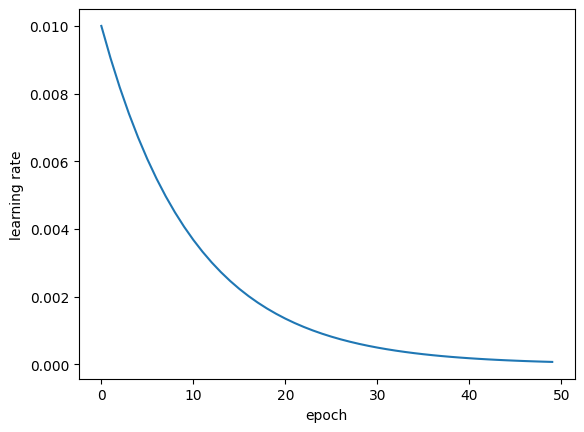

In [17]:
# Plot the learning rate as a function of the number of epochs
plt.plot(lr_exp_decay(np.arange(0,nepochs),0.01))
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

In [18]:
# Train the network with the learning rate schedule
model = build_compile()
history_exp_decay = model.fit(
    x_train,
    y_train,
    epochs=nepochs,
    batch_size=32,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_exp_decay, verbose=1)], validation_data=(x_test, y_test))


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6508 - accuracy: 0.8327 - val_loss: 0.3607 - val_accuracy: 0.9021 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009048374180359595.
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3430 - accuracy: 0.9039 - val_loss: 0.3012 - val_accuracy: 0.9161 - lr: 0.0090

Epoch 3: LearningRateScheduler setting learning rate to 0.008187307530779819.
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2981 - accuracy: 0.9165 - val_loss: 0.2741 - val_accuracy: 0.9235 - lr: 0.0082

Epoch 4: LearningRateScheduler setting learning rate to 0.007408182206817179.
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2724 - accuracy: 0.9238 - val_loss: 0.2550 - val_accuracy: 0.9279 - lr: 0.0074

Epoch 5: LearningRateScheduler setting learning rate to 0.0067032004603

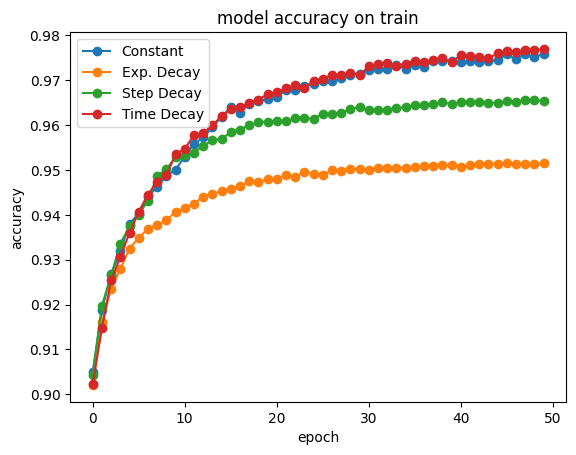

In [19]:
# summarize history for accuracy
plt.plot(hist_acc[0],'-o',label='Constant')
plt.plot(history_exp_decay.history['val_accuracy'],'-o', label="Exp. Decay")
plt.plot(history_step_decay.history['val_accuracy'],'-o', label="Step Decay")
plt.plot(history_time_based_decay.history['val_accuracy'],'-o', label="Time Decay")
plt.title('model accuracy on train')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

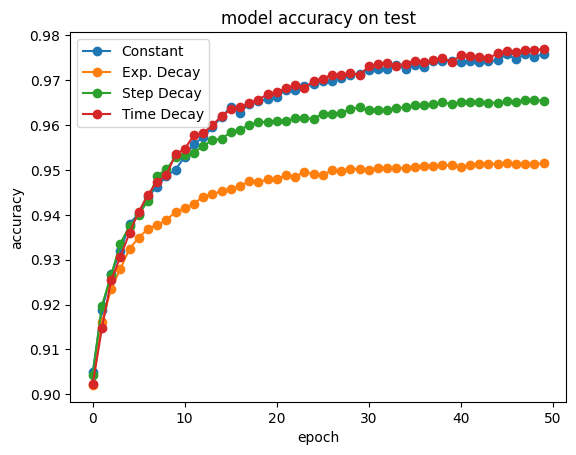

In [20]:
plt.plot(hist_val_acc[0],'-o',label='Constant')
plt.plot(history_exp_decay.history['val_accuracy'],'-o', label="Exp. Decay")
plt.plot(history_step_decay.history['val_accuracy'],'-o', label="Step Decay")
plt.plot(history_time_based_decay.history['val_accuracy'],'-o', label="Time Decay")
plt.title('model accuracy on test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

In [21]:
# Build the model with an L2 regularization added to all weights

model_l2 = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                      keras.layers.Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
                      keras.layers.Dense(10, activation='softmax',kernel_regularizer=keras.regularizers.l2(0.001))])

# Compile the model and optimize with adam
model_l2.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [22]:
# Fit the model to the data while providing a validation set for each epoch
history_l2 = model_l2.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4192 - accuracy: 0.9203 - val_loss: 0.2935 - val_accuracy: 0.9526
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2908 - accuracy: 0.9546 - val_loss: 0.2857 - val_accuracy: 0.9555
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2732 - accuracy: 0.9609 - val_loss: 0.2587 - val_accuracy: 0.9636
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2673 - accuracy: 0.9627 - val_loss: 0.2553 - val_accuracy: 0.9651
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2631 - accuracy: 0.9644 - val_loss: 0.2652 - val_accuracy: 0.9625
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2608 - accuracy: 0.9651 - val_loss: 0.2650 - val_accuracy: 0.9614
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2586 - accuracy: 0.9653 - val_loss: 0.2526 - val_accura

In [23]:
# Build the model with early stopping
model_es = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dense(10, activation='softmax')])

# Compile the model and optimize with adam
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model_es.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [24]:
# Fit the model to the data while providing a validation set for each epoch
history_es = model_es.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[es])


Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2559 - accuracy: 0.9261 - val_loss: 0.1406 - val_accuracy: 0.9576
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1147 - accuracy: 0.9658 - val_loss: 0.1085 - val_accuracy: 0.9668
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0791 - accuracy: 0.9768 - val_loss: 0.0844 - val_accuracy: 0.9740
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0593 - accuracy: 0.9820 - val_loss: 0.0810 - val_accuracy: 0.9754
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.0709 - val_accuracy: 0.9777
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0708 - val_accuracy: 0.9778
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0791 - val_accuracy

In [25]:
# Build the model with dropout
model_dropout = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dropout(.2),
                      keras.layers.Dense(10, activation='softmax'),
                      keras.layers.Dropout(.2)])

# Compile the model and optimize with adam
model_dropout.compile(optimizer='Adam', loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [26]:
# Fit the model to the data while providing a validation set for each epoch
history_dropout = model_dropout.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7970 - accuracy: 0.7174 - val_loss: 0.4872 - val_accuracy: 0.9291
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2213 - accuracy: 0.7524 - val_loss: 0.3779 - val_accuracy: 0.9438
Epoch 3/50
1875/1875 [==============================] - 10s 6ms/step - loss: 1.0551 - accuracy: 0.7637 - val_loss: 0.3369 - val_accuracy: 0.9538
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9741 - accuracy: 0.7663 - val_loss: 0.2972 - val_accuracy: 0.9611
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9173 - accuracy: 0.7693 - val_loss: 0.2605 - val_accuracy: 0.9657
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8598 - accuracy: 0.7767 - val_loss: 0.2588 - val_accuracy: 0.9680
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8289 - accuracy: 0.7744 - val_loss: 0.2314 - val_accura

KeyError: 'val_acc'

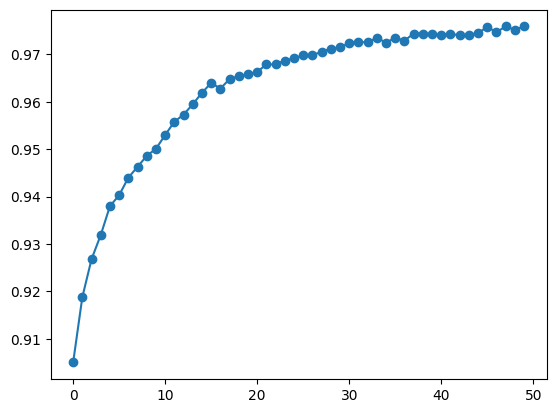

In [27]:
# summarize history for accuracy
plt.plot(hist_val_acc[0],'-o', label='Standard')
plt.plot(history_l2.history['val_acc'],'-o', label="L2")
plt.plot(history_es.history['val_acc'],'-o', label="Early Stopping")
plt.plot(history_dropout.history['val_acc'],'-o', label="Dropout")
plt.title('model accuracy on test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()